In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [2]:
(X_train, Y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
result = np.array_split(X_train, 5)  

In [4]:
train_x = result[1]

In [5]:
new = result[2]

In [102]:
train_x.shape

(10000, 32, 32, 3)

In [103]:
x_train = X_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train),32,32,3)) 
x_test = np.reshape(x_test, (len(x_train),32,32,3)) 

In [104]:
noise_factor = 0.25
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

In [105]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [106]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (2, 2), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
#model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 8)         2312      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 8, 8, 8)           584       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 8)         

In [107]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=8, shuffle=True, 
          validation_data=(x_test_noisy, x_test))

Epoch 1/10
1250/1250 [==============================] - 41s 32ms/step - loss: 0.0298 - val_loss: 0.0201
Epoch 2/10
1250/1250 [==============================] - 37s 30ms/step - loss: 0.0186 - val_loss: 0.0175
Epoch 3/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.0170 - val_loss: 0.0168
Epoch 4/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.0162 - val_loss: 0.0159
Epoch 5/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.0157 - val_loss: 0.0153
Epoch 6/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.0154 - val_loss: 0.0150
Epoch 7/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.0150 - val_loss: 0.0153
Epoch 8/10
1250/1250 [==============================] - 36s 29ms/step - loss: 0.0148 - val_loss: 0.0145
Epoch 9/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.0146 - val_loss: 0.0152
Epoch 10/10
1250/1250 [==============================] - 32s 26m

In [108]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.0144


0.014365139417350292

In [109]:
new = new.astype('float32') / 255
new = np.reshape(new, (len(new),32,32,3)) 

In [110]:
no_noise_img = model.predict(new)

313/313 [==============================] - 6s 20ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


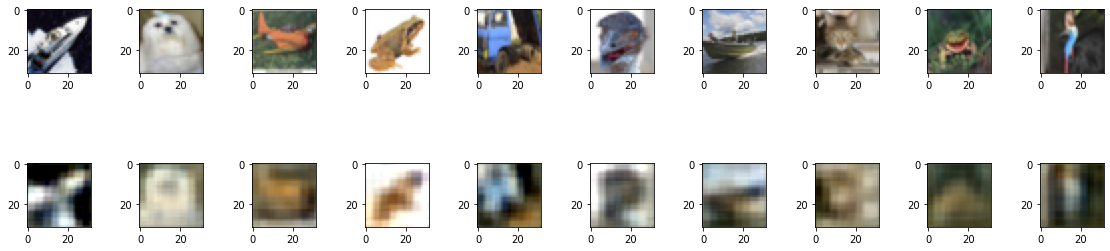

In [111]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(new[i])
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i])

plt.show()